In [11]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'NFLX']
px = yf.download(tickers, start="2021-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [12]:
px

Ticker,AAPL,NFLX
Date,,
2021-01-04 00:00:00+00:00,126.544235,522.859985
2021-01-05 00:00:00+00:00,128.108795,520.799988
2021-01-06 00:00:00+00:00,123.796417,500.489990
2021-01-07 00:00:00+00:00,128.020782,508.890015
2021-01-08 00:00:00+00:00,129.125778,510.399994
...,...,...
2025-01-21 00:00:00+00:00,222.639999,869.679993
2025-01-22 00:00:00+00:00,223.830002,953.989990
2025-01-23 00:00:00+00:00,223.660004,984.859985


In [13]:
def drawdown(px):
    return (px/ px.expanding(min_periods=1).max() - 1)

In [14]:
dd = drawdown(px)
dd

Ticker,AAPL,NFLX
Date,,
2021-01-04 00:00:00+00:00,0.000000,0.000000
2021-01-05 00:00:00+00:00,0.000000,-0.003940
2021-01-06 00:00:00+00:00,-0.033662,-0.042784
2021-01-07 00:00:00+00:00,-0.000687,-0.026718
2021-01-08 00:00:00+00:00,0.000000,-0.023830
...,...,...
2025-01-21 00:00:00+00:00,-0.140452,-0.071410
2025-01-22 00:00:00+00:00,-0.135858,0.000000
2025-01-23 00:00:00+00:00,-0.136515,0.000000


<Axes: xlabel='Date'>

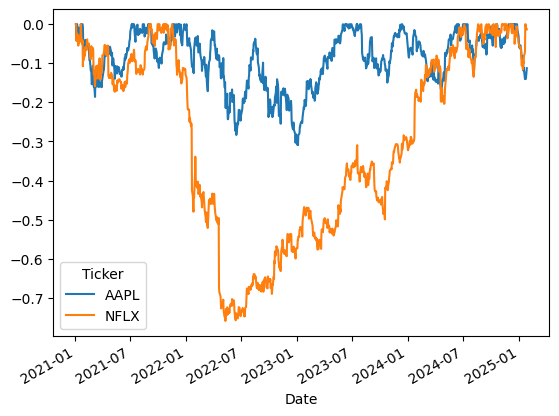

In [15]:
dd.plot()

In [16]:
dd.min()

Ticker
AAPL   -0.309128
NFLX   -0.759473
dtype: float64

In [19]:
def duration(px):
    peak = px.expanding(min_periods=1).max()
    res = pd.DataFrame(index=px.index, columns=px.columns)

    for col in px.columns:
        for dt in px.index:
            if px.loc[dt, col] >= peak.loc[dt, col]:
                res.loc[dt, col] = 0
            else:
                res.loc[dt, col] = res.loc[:dt, col].iloc[-2] + 1

    
    return res
            

In [20]:
ddd = duration(px)
ddd

Ticker,AAPL,NFLX
Date,,
2021-01-04 00:00:00+00:00,0,0
2021-01-05 00:00:00+00:00,0,1
2021-01-06 00:00:00+00:00,1,2
2021-01-07 00:00:00+00:00,2,3
2021-01-08 00:00:00+00:00,0,4
...,...,...
2025-01-21 00:00:00+00:00,15,25
2025-01-22 00:00:00+00:00,16,0
2025-01-23 00:00:00+00:00,17,0


<Axes: xlabel='Date'>

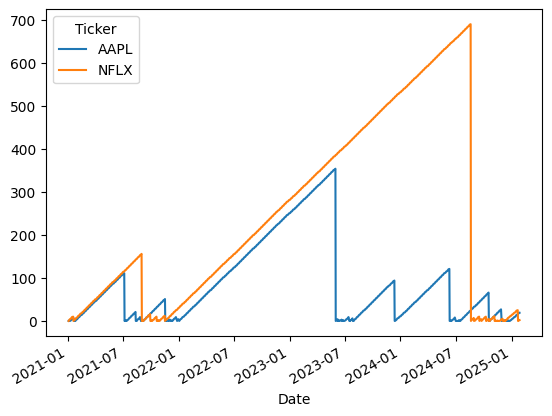

In [21]:
ddd.plot()

In [22]:
ddd.max()

Ticker
AAPL    354
NFLX    690
dtype: object

In [23]:
ddd.min()

Ticker
AAPL    0
NFLX    0
dtype: object